# matplotlib 

如果发现数据有异常 比如异常值 缺失值 进一步清理和检查数据

表示定性变量的柱状图和表示定性变量的直方图

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb#seaborn另一个简写是sns

%matplotlib inline

In [16]:
pokemon = pd.read_csv('./data/pokemon.csv')
print(pokemon.shape)

pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

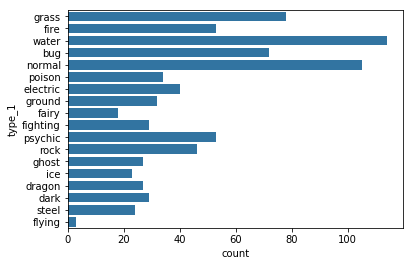

In [17]:
#创建柱状图 使用seaborn的countplot 
#generation_id作为x轴 y轴是频率 出现了几次

base_color = sb.color_palette()[0]#结果是一个数组 里面存着很多元组  取出第一个 也就是深蓝色
#排序 从多到少 pandas的序列函数value_counts() 排上用场

display(pokemon['generation_id'].value_counts())#结果是series


sb.countplot(data = pokemon ,y = 'type_1',color = base_color);

Text(0.5,0,'propertion')

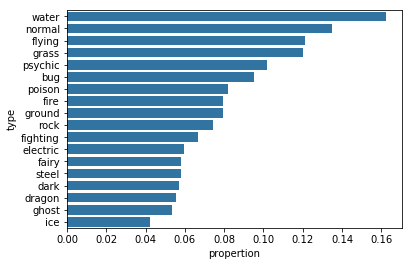

In [26]:
# 绝对频率和相对频率

#数据整理 dataFrame  把两种属性并为一列


pkmn_types = pokemon.melt(
    id_vars = ['id','species'],
    value_vars = ['type_1','type_2'],
    var_name = 'type_level',
    value_name = 'type'
)




#type_count 
type_counts = pkmn_types['type'].value_counts()#结果为series 
type_order = type_counts.index#得到一个数组 当从大到小排序后 最大值的原下标为第一个



#计算最大值

n_pokemon = pokemon.shape[0]#总共多少个精灵
max_type_count = type_counts[0]#最多是精灵有多少个

max_prop = max_type_count / n_pokemon#数量最多的精灵所占的比例

# #绘制刻度 结果是整型
tick_props = np.arange(0,max_prop,0.02)

# #字符串类型
tick_names = ['{:0.2f}'.format(v) for v in tick_props]




#取到蓝色
base_color = sb.color_palette()[0]

sb.countplot(data = pkmn_types ,y = 'type',color = base_color,order = type_order);

# 现在数量统计是绝对值 每种属性的精灵的数量 这里不要把它转换成小数 而是继续用整数

#修改刻度  tick_name每一个值 也就是一个刻度 对应前面的具体数量

plt.xticks(tick_props * n_pokemon,tick_names)
#例如 tick_names是 0 0.02 0.04   对应是是 精灵总数x0 精灵总数x0.02  精灵总数x0.04
plt.xlabel('propertion')#修改label

# print(tick_props)
# print(n_pokemon)
# tick_props * 

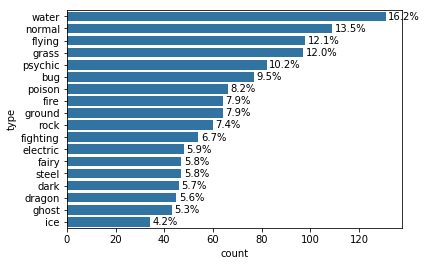

In [33]:
#将百分分比 标在每一条上面
sb.countplot(data = pkmn_types ,y = 'type',color = base_color,order = type_order);

# print(type_counts)
#shape[0]是总数 
for i in range(type_counts.shape[0]):
    count = type_counts[i]#type_count是一个series
    #算出百分比 
    pct_string = '{:0.1f}%'.format(100*count / n_pokemon)
    
    #text的第一个参数 是x的位置 放在柱型末端
    #text的第二个参数 是y的位置 从0 开始 一次递增  0则是放在最上面的位置 也就是 第一条的位置
    #参数3就是要输出的字符串
    # 参数4是对齐方式 可以居中对齐 va 上下居中   ha 左右居中
    plt.text(count+1,i,pct_string,va = 'center')